In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [52]:
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [2]:
df=pd.read_csv("IMDb Movies India.csv" , encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [4]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.shape

(15509, 10)

In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [10]:
df.shape

(5659, 10)

In [11]:
df['Year']=df['Year'].str.extract('(\d+)') #\d+ means match one or more digit
df['Year']=pd.to_numeric(df['Year'],errors='coerce') #Type coercion refers to the automatic conversion of one data type to another, usually performed by the Python interpreter.

In [12]:
df['Duration']=df['Duration'].str.extract('(\d+)')
df['Duration']=pd.to_numeric(df['Duration'],errors='coerce')

In [13]:
df['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [14]:
genre=df['Genre']
genre.head(5)

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [15]:
genre = df['Genre'].str.split(', ', expand=True)
genre.head(5)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [16]:
genre=df['Genre'].str.split(', ',expand=True)
genre.head(5)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [17]:
genre_counts = {}
for genre in genre.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [18]:
gnrpie=df['Genre'].value_counts()
gnrpie.head(5)

Drama                   844
Drama, Romance          332
Action, Crime, Drama    329
Action, Drama           206
Comedy, Drama           205
Name: Genre, dtype: int64

In [19]:
genrePie = pd.DataFrame(list(gnrpie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(5)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


In [20]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df["Votes"].head(5)

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int32

In [21]:
directors = df["Director"].value_counts()
directors.head(5)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: Director, dtype: int64

In [22]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors.head(5)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

In [23]:
sns.set(style="ticks")


Text(0, 0.5, 'Count')

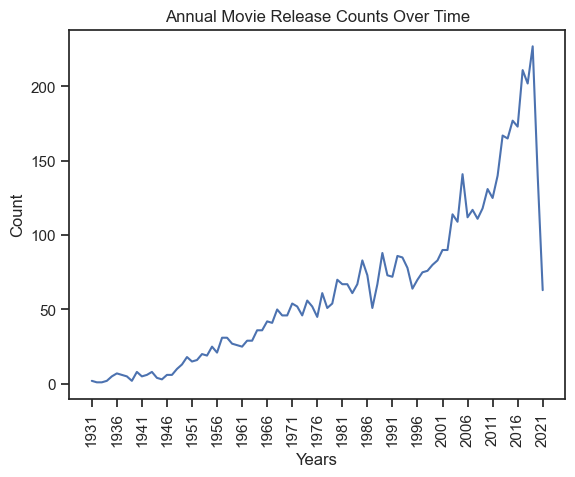

In [24]:
ax = sns.lineplot(data=df['Year'].value_counts().sort_index())
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")

Text(0, 0.5, 'Average Duration(in minutes)')

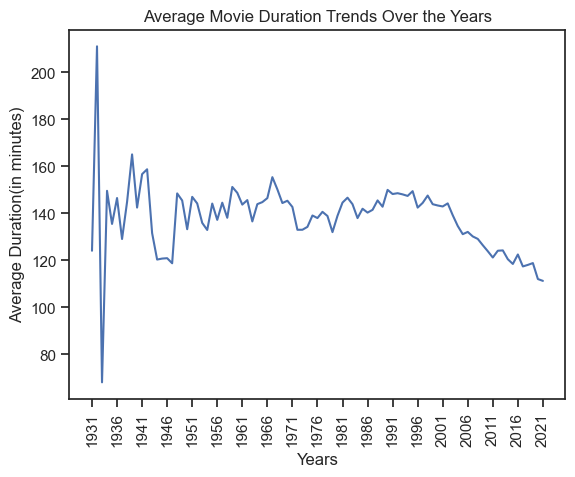

In [25]:
ax = sns.lineplot(data=df.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')


[Text(0, 0, 'Action'),
 Text(1, 0, 'Adventure'),
 Text(2, 0, 'Animation'),
 Text(3, 0, 'Biography'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Crime'),
 Text(6, 0, 'Documentary'),
 Text(7, 0, 'Drama'),
 Text(8, 0, 'Family'),
 Text(9, 0, 'Fantasy'),
 Text(10, 0, 'History'),
 Text(11, 0, 'Horror'),
 Text(12, 0, 'Music'),
 Text(13, 0, 'Musical'),
 Text(14, 0, 'Mystery'),
 Text(15, 0, 'News'),
 Text(16, 0, 'Romance'),
 Text(17, 0, 'Sci-Fi'),
 Text(18, 0, 'Sport'),
 Text(19, 0, 'Thriller'),
 Text(20, 0, 'War'),
 Text(21, 0, 'Western')]

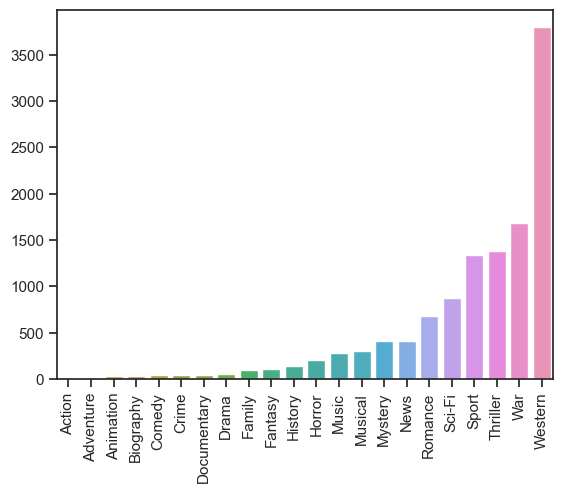

In [26]:
genreLabels = sorted(genereCounts.keys())
genreCounts = sorted(genereCounts.values())
ax = sns.barplot(x = genreLabels, y = genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation = 90)

In [27]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
plt.show()

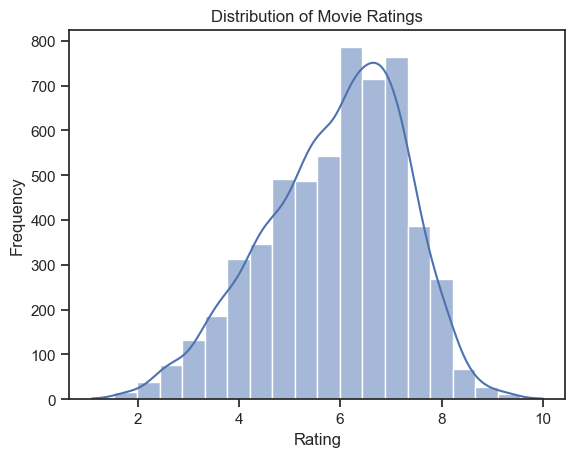

In [28]:
ax = sns.histplot(data = df, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

Text(0.5, 1.0, 'Total Votes per Rating')

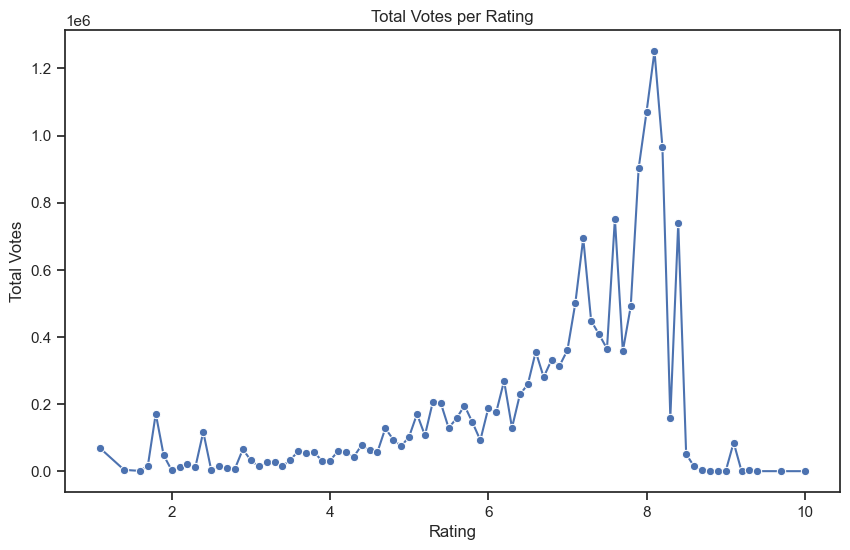

In [29]:
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax_line_seaborn = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')

[Text(0, 0, 'David Dhawan'),
 Text(1, 0, 'Mahesh Bhatt'),
 Text(2, 0, 'Ram Gopal Varma'),
 Text(3, 0, 'Hrishikesh Mukherjee'),
 Text(4, 0, 'Shakti Samanta'),
 Text(5, 0, 'Vikram Bhatt'),
 Text(6, 0, 'Priyadarshan'),
 Text(7, 0, 'Basu Chatterjee'),
 Text(8, 0, 'Rama Rao Tatineni'),
 Text(9, 0, 'Shyam Benegal'),
 Text(10, 0, 'Yash Chopra'),
 Text(11, 0, 'K. Bapaiah'),
 Text(12, 0, 'Kanti Shah'),
 Text(13, 0, 'Harmesh Malhotra'),
 Text(14, 0, 'Shyam Ramsay'),
 Text(15, 0, 'Manmohan Desai'),
 Text(16, 0, 'Subhash Ghai'),
 Text(17, 0, 'Ravikant Nagaich'),
 Text(18, 0, 'Raj Khosla'),
 Text(19, 0, 'Mahesh Manjrekar')]

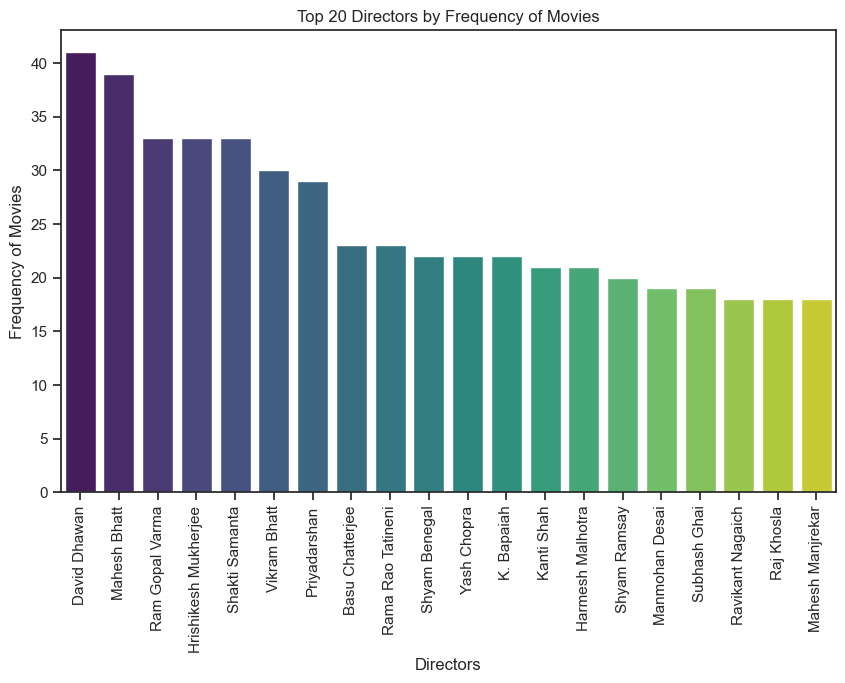

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Mithun Chakraborty'),
 Text(1, 0, 'Amitabh Bachchan'),
 Text(2, 0, 'Dharmendra'),
 Text(3, 0, 'Ashok Kumar'),
 Text(4, 0, 'Akshay Kumar'),
 Text(5, 0, 'Shashi Kapoor'),
 Text(6, 0, 'Jeetendra'),
 Text(7, 0, 'Sanjay Dutt'),
 Text(8, 0, 'Rekha'),
 Text(9, 0, 'Ajay Devgn'),
 Text(10, 0, 'Govinda'),
 Text(11, 0, 'Rishi Kapoor'),
 Text(12, 0, 'Naseeruddin Shah'),
 Text(13, 0, 'Sanjeev Kumar'),
 Text(14, 0, 'Jackie Shroff'),
 Text(15, 0, 'Anil Kapoor'),
 Text(16, 0, 'Rajesh Khanna'),
 Text(17, 0, 'Salman Khan'),
 Text(18, 0, 'Shabana Azmi'),
 Text(19, 0, 'Shatrughan Sinha')]

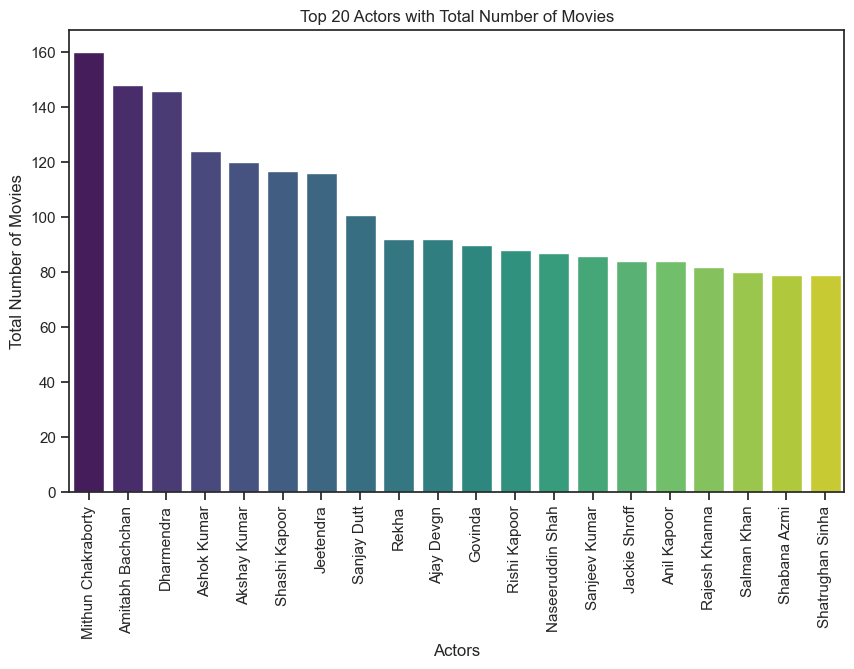

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [34]:
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df["Directors"] = df['Director'].astype('category').cat.codes
df["Genres"] = df['Genre'].astype('category').cat.codes
df["Actors"] = df['Actor'].astype('category').cat.codes
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3875
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3343
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1119
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2086
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5562


In [35]:
Input = df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = df['Rating']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [37]:
from sklearn.linear_model import LinearRegression


In [38]:
model = LinearRegression()

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred = model.predict(x_test)

In [41]:
model.score(x_test,y_test)

0.09870444696678471

Linear Regression shows 9.8% accuracy

Now, building the model with other models like RandomForest, GradientBoosting, and Kneighbours 

In [54]:
# Random forest regression model
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)


# GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
# GBR.fit(x_train, y_train)
# gb_preds = GBR.predict(x_test)


# KNR = KNeighborsRegressor(n_neighbors=5)
# KNR.fit(x_train, y_train)
# knn_preds = KNR.predict(x_test)
# RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
# DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
# XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
# GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
# KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

RandomForestRegressor(random_state=1)

In [58]:
rf_preds = RFR.predict(x_test)

RFScore = RFR.score(x_test, y_test)

In [59]:
RFScore

0.3335206355488286

Random forest model shows some improvent than liner regression. The random forest model has 33% accuracy which is far better than 9%

In [60]:
# Gradiant boosting algorithm
GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

In [62]:
GBR.score(x_test,y_test)

0.36826394967113263

Gradient Boosting shows 36% accuracy which is slightly higher than 33%